In [1]:
import pandas as pd

pd.set_option('display.max_columns', None)
#pd.reset_option('display.max_rows')
pd.set_option('display.max_rows', 20)  # ao invés de none pode por INT do limite
pd.set_option('display.max_colwidth', 15)

In [2]:
df = pd.read_csv('../data/df_subvar.csv')

In [3]:
df = df.loc[(df['WhiteElo'] >= 2500) | (df['WhiteElo'].isna())]
df = df.loc[(df['BlackElo'] >= 2500) | (df['BlackElo'].isna())]

In [4]:
df = df.sort_values('SubVariation')
df.head(5)

,id,Event,Site,Date,White,Black,Result,BlackElo,ECO,WhiteElo,WhiteWon,BlackWon,Moves,WhiteFinalPiecesCount,BlackFinalPiecesCount,FinalPiecesCount,QueenTrade,Evals,MaxEval,MinEval,FinalEval,W<=10,W<=25,W<=50,W<=100,W<=200,W<=500,W>500,B<=10,B<=25,B<=50,B<=100,B<=200,B<=500,B>500,Wprojection,Bprojection,DifProjection,Plays,SubVariation,Mainline
563,366954,Chartres op,Chartres,1990,Gerald,"Pascot, J.",0-1,NaN,C89,NaN,0,1,41,2,3,5,1,"[29, 57, 54...",444,-1009,-1009,10,2,6,7,4,5,1,15,6,5,6,3,4,1,6012,-17288,-11276,1. e4 e5 2....,9. Bc2 dxe4,"['e4', 'e5'..."
1560,1024350,Yanofsky Mem,Winnipeg,2004,"Pierre,Rolland","Prince,Colin",1-0,NaN,C89,NaN,1,0,39,9,6,15,0,"[20, 50, 47...",2651,-230,2075,10,2,5,5,3,2,1,15,1,4,6,5,4,3,29804,-293,29511,1. e4 e5 2....,9. d3 Bb7,"['e4', 'e5'..."
348,224874,Ramsgate,Ramsgate/Ma...,1984,"O'Brien, Ri...","Crawley, Gavin",0-1,NaN,C89,NaN,0,1,47,4,5,9,0,"[26, 53, 47...",155,-698,-698,21,7,4,5,2,0,1,26,10,5,3,2,0,0,3270,-3185,85,1. e4 e5 2....,9. d3 Bb7,"['e4', 'e5'..."
192,125789,Lugano ol (...,Lugano,1968,"Yanofsky, D...","Rovira Mas,...",1-0,NaN,C89,NaN,1,0,41,6,4,10,1,"[37, 53, 54...",299,-109,275,10,14,4,6,0,0,0,21,7,3,6,2,1,0,4204,-850,3354,1. e4 e5 2....,9. d3 Bg4,"['e4', 'e5'..."
602,392471,Novi Sad ol...,Novi Sad,1990,"Cardose, S.","Gambiza, N.",1-0,NaN,C89,NaN,1,0,54,1,0,1,1,"[46, 55, 52...",1508,-447,1286,13,4,7,7,4,0,2,18,6,14,8,3,3,1,45458,-582,44876,1. e4 e5 2....,9. d3 Bg4,"['e4', 'e5'..."


In [5]:
df_aux = df.loc[:, ['SubVariation', 'Result']].groupby(
    by=['SubVariation', 'Result']).agg('Result').count().to_frame()
df_aux.rename(columns={'Result': 'Count'}, inplace=True)
df_aux.reset_index(inplace=True)

b_win = df_aux[df_aux['Result'] == '0-1']
w_win = df_aux[df_aux['Result'] == '1-0']
draw = df_aux[df_aux['Result'] == '1/2-1/2']

results = []
for v in df_aux['SubVariation'].unique().tolist():
    w = w_win.loc[w_win['SubVariation'] == v, 'Count'].tolist()
    d = draw.loc[draw['SubVariation'] == v, 'Count'].tolist()
    b = b_win.loc[b_win['SubVariation'] == v, 'Count'].tolist()

    if len(w) == 0:
        w = 0
    else:
        w = w[0]

    if len(d) == 0:
        d = 0
    else:
        d = d[0]

    if len(b) == 0:
        b = 0
    else:
        b = b[0]

    row = {}

    row['SubVariation'] = v
    row['Games'] = w+d+b
    row['Results'] = tuple([w,d,b])

    results.append(row)

df_results = pd.DataFrame(results)


[('9. Bc2 dxe4', 1, (0, 0, 1)),
 ('9. d3 Bb7', 2, (1, 0, 1)),
 ('9. d3 Bg4', 11, (5, 4, 2)),
 ('9. d3 Qd6', 1, (0, 1, 0)),
 ('9. d3 d4', 2, (1, 1, 0)),
 ('9. d3 dxe4', 20, (4, 11, 5)),
 ('9. d3 h6', 1, (1, 0, 0)),
 ('9. d4 Bg4', 2, (2, 0, 0)),
 ('9. d4 Nxe4', 13, (7, 3, 3)),
 ('9. d4 dxe4', 20, (3, 14, 3)),
 ('9. d4 exd4', 33, (9, 12, 12)),
 ('9. exd5 Nxd5', 1018, (291, 463, 264)),
 ('9. exd5 e4', 65, (28, 14, 23)),
 ('9. h3 dxe4', 2, (0, 0, 2))]

In [6]:
df['SubVariation'].unique()

array(['9. Bc2 dxe4', '9. d3 Bb7', '9. d3 Bg4', '9. d3 Qd6', '9. d3 d4',
       '9. d3 dxe4', '9. d3 h6', '9. d4 Bg4', '9. d4 Nxe4', '9. d4 dxe4',
       '9. d4 exd4', '9. exd5 Nxd5', '9. exd5 e4', '9. h3 dxe4'],
      dtype=object)

/tmp/ipykernel_39148/2469112444.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


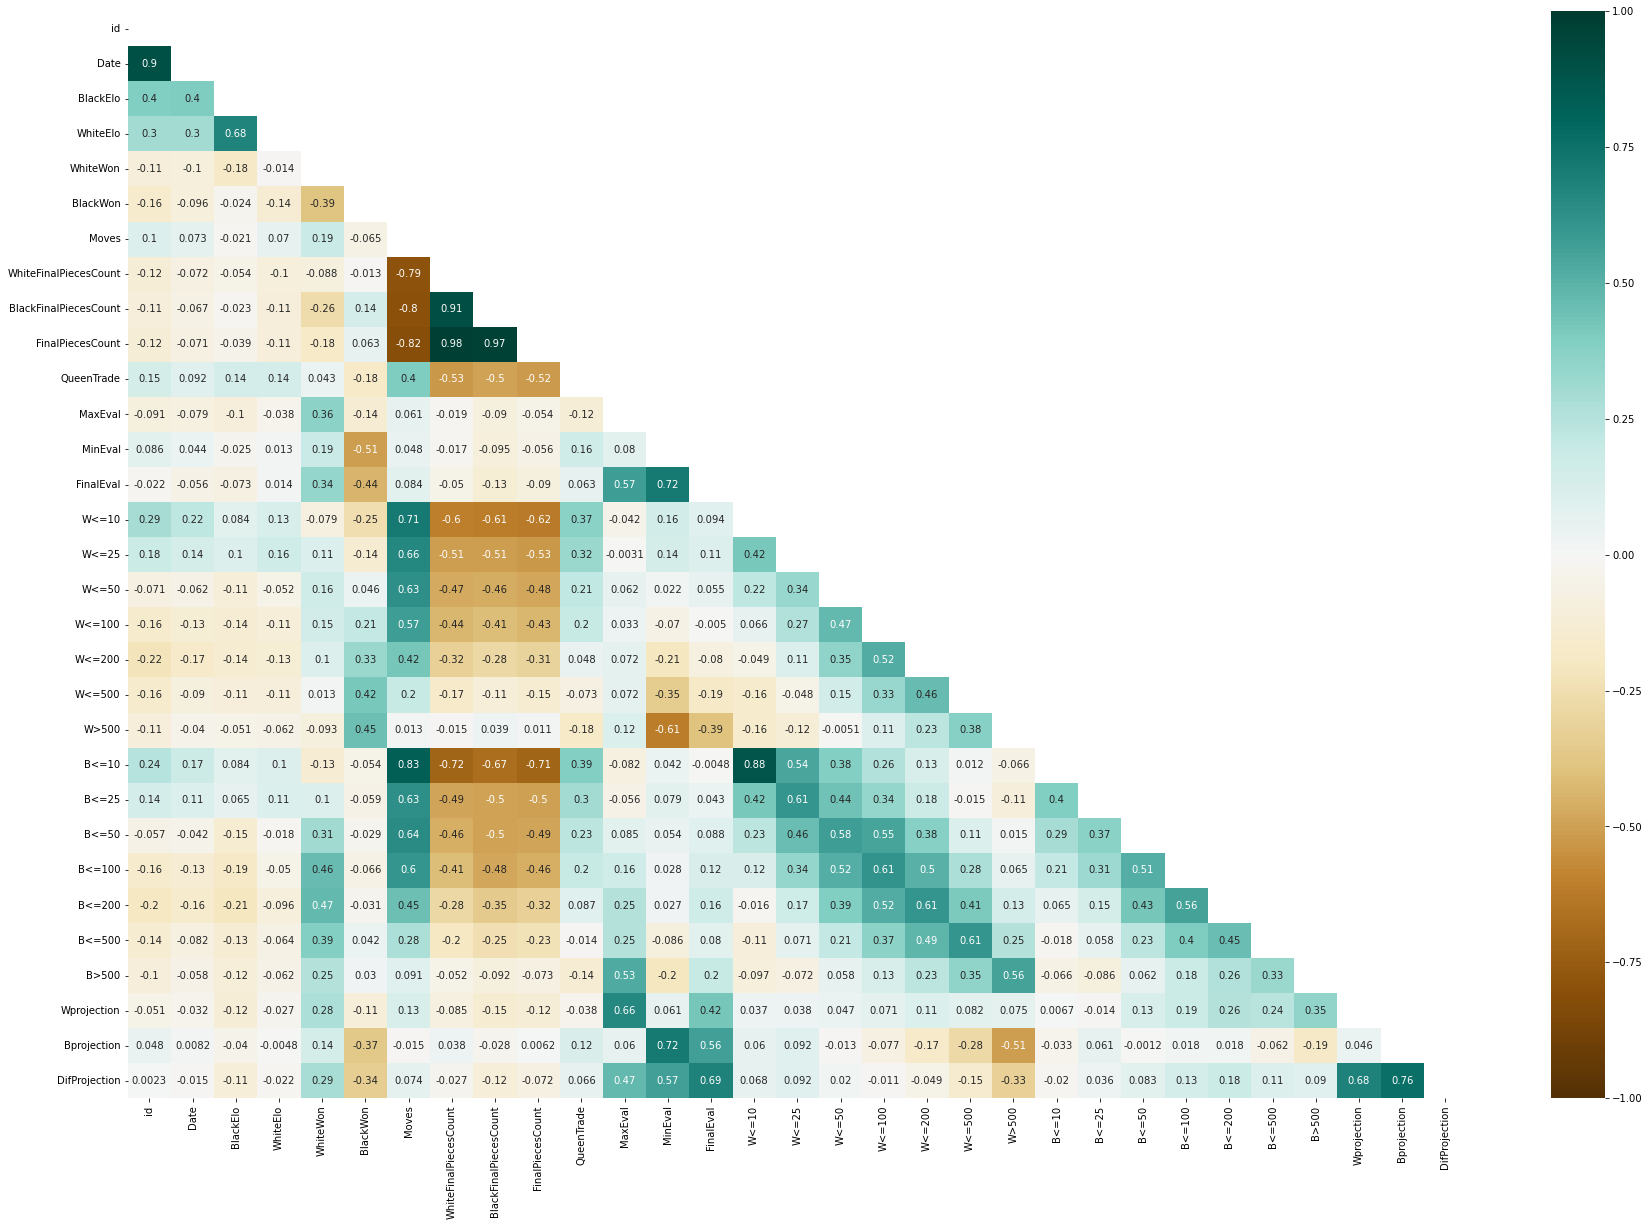

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(30, 20))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
#heatmap.set_title('asd', fontdict={'fontsize':32}, pad=16);

<AxesSubplot:ylabel='DifProjection'>

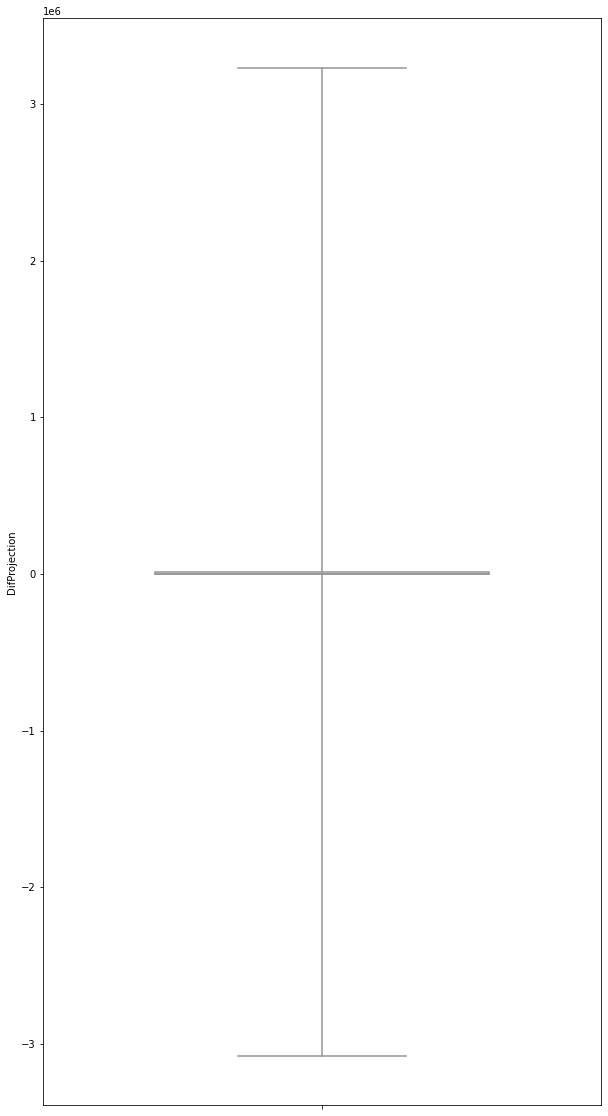

In [8]:
# Plot the orbital period with horizontal boxes
fig, ax = plt.subplots(1,1, figsize=(10,20))

sns.boxplot(y="DifProjection", data=df,
            whis=[0, 100], width=0.6, palette="vlag", ax=ax)

<AxesSubplot:xlabel='Result', ylabel='Moves'>

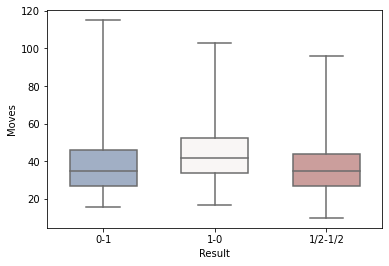

In [9]:
# Plot the orbital period with horizontal boxes
sns.boxplot(x="Result", y="Moves", data=df,
            whis=[0, 100], width=.6, palette="vlag")

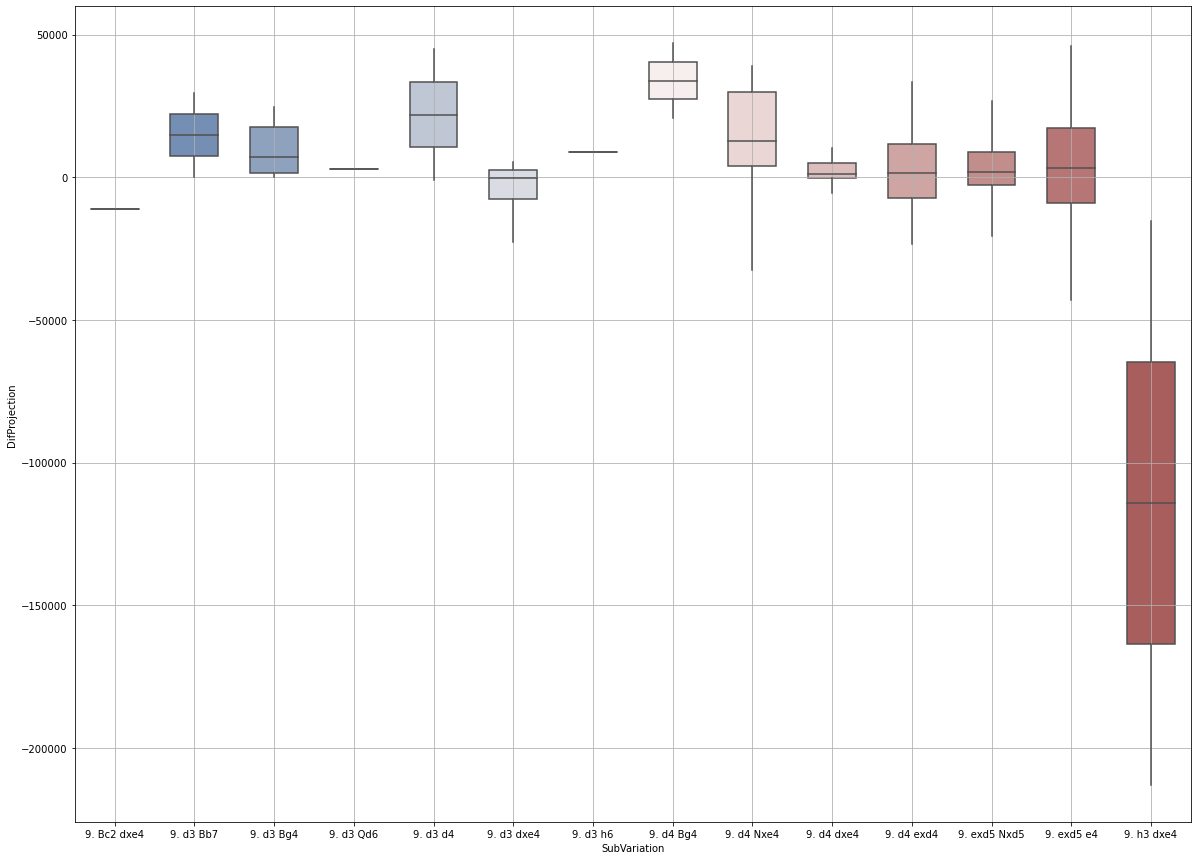

In [10]:
fig, ax = plt.subplots(1,1, figsize=(20,15))
# Plot the orbital period with horizontal boxes
sns.boxplot(x="SubVariation", y="DifProjection", data=df,
            whis=1.5, width=.6, palette="vlag", ax=ax, showcaps=False, showfliers=False)

ax.yaxis.grid(True) # Hide the horizontal gridlines
ax.xaxis.grid(True) # Show the vertical gridlines

In [11]:
df

,id,Event,Site,Date,White,Black,Result,BlackElo,ECO,WhiteElo,WhiteWon,BlackWon,Moves,WhiteFinalPiecesCount,BlackFinalPiecesCount,FinalPiecesCount,QueenTrade,Evals,MaxEval,MinEval,FinalEval,W<=10,W<=25,W<=50,W<=100,W<=200,W<=500,W>500,B<=10,B<=25,B<=50,B<=100,B<=200,B<=500,B>500,Wprojection,Bprojection,DifProjection,Plays,SubVariation,Mainline
563,366954,Chartres op,Chartres,1990,Gerald,"Pascot, J.",0-1,NaN,C89,NaN,0,1,41,2,3,5,1,"[29, 57, 54...",444,-1009,-1009,10,2,6,7,4,5,1,15,6,5,6,3,4,1,6012,-17288,-11276,1. e4 e5 2....,9. Bc2 dxe4,"['e4', 'e5'..."
1560,1024350,Yanofsky Mem,Winnipeg,2004,"Pierre,Rolland","Prince,Colin",1-0,NaN,C89,NaN,1,0,39,9,6,15,0,"[20, 50, 47...",2651,-230,2075,10,2,5,5,3,2,1,15,1,4,6,5,4,3,29804,-293,29511,1. e4 e5 2....,9. d3 Bb7,"['e4', 'e5'..."
348,224874,Ramsgate,Ramsgate/Ma...,1984,"O'Brien, Ri...","Crawley, Gavin",0-1,NaN,C89,NaN,0,1,47,4,5,9,0,"[26, 53, 47...",155,-698,-698,21,7,4,5,2,0,1,26,10,5,3,2,0,0,3270,-3185,85,1. e4 e5 2....,9. d3 Bb7,"['e4', 'e5'..."
192,125789,Lugano ol (...,Lugano,1968,"Yanofsky, D...","Rovira Mas,...",1-0,NaN,C89,NaN,1,0,41,6,4,10,1,"[37, 53, 54...",299,-109,275,10,14,4,6,0,0,0,21,7,3,6,2,1,0,4204,-850,3354,1. e4 e5 2....,9. d3 Bg4,"['e4', 'e5'..."
602,392471,Novi Sad ol...,Novi Sad,1990,"Cardose, S.","Gambiza, N.",1-0,NaN,C89,NaN,1,0,54,1,0,1,1,"[46, 55, 52...",1508,-447,1286,13,4,7,7,4,0,2,18,6,14,8,3,3,1,45458,-582,44876,1. e4 e5 2....,9. d3 Bg4,"['e4', 'e5'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,432619,Oberschwabe...,Jedesheim,1991,"Rector, D.","Rothmund, J.",0-1,NaN,C89,NaN,0,1,16,13,11,24,0,"[44, 42, 43...",177,-768,-762,7,2,2,0,1,2,0,11,2,0,1,1,0,0,1321,-3237,-1916,1. e4 e5 2....,9. exd5 e4,"['e4', 'e5'..."
1707,1118881,IRT5,Sao Paulo,2006,"Jonas,Tiago...","Francelli,D...",1/2-1/2,NaN,C89,NaN,0,0,20,12,10,22,1,"[28, 40, 47...",156,-338,-29,6,5,2,2,0,1,0,7,5,3,2,2,0,0,1367,-3278,-1911,1. e4 e5 2....,9. exd5 e4,"['e4', 'e5'..."
96,63572,Sao Paulo zt,Sao Paulo,1960,"Recalde, E.","Camara, Ronald",1/2-1/2,NaN,C89,NaN,0,0,20,11,10,21,0,"[32, 58, 42...",163,-142,143,8,3,3,2,1,0,0,9,4,3,0,3,0,0,2446,-142,2304,1. e4 e5 2....,9. exd5 e4,"['e4', 'e5'..."
1129,747453,CRO-chT2,Tucepi,1996,"Jelic, J.","Sertic, Rudolf",0-1,NaN,C89,NaN,0,1,22,11,12,23,0,"[27, 44, 54...",59,-99995,-99995,10,2,1,0,3,3,1,13,5,0,2,1,0,0,691,-213600,-212909,1. e4 e5 2....,9. h3 dxe4,"['e4', 'e5'..."
